In [35]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import numpy as np

import math

In [36]:
df = pd.read_csv(r'Data/uswtdb_v5_0_20220427_rename.csv')

C:\Users\ernin\AppData\Local\Temp\ipykernel_5392\981677327.py:1: DtypeWarning: Columns (1,2,3,4,6,7,8,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'Data/uswtdb_v5_0_20220427_rename.csv')


In [37]:
df.shape

(71784, 124)

In [38]:
df.columns.tolist()

['Plant Id',
 'Combined Heat And\r\nPower Plant',
 'Nuclear Unit Id',
 'Plant Name',
 'Operator Name',
 'Operator Id',
 'Plant State',
 'Census Region',
 'NERC Region',
 'Reserved',
 'NAICS Code',
 'EIA Sector Number',
 'Sector Name',
 'Reported\r\nPrime Mover',
 'Reported\r\nFuel Type Code',
 'AER\r\nFuel Type Code',
 'Balancing\r\nAuthority Code',
 'Respondent\r\nFrequency',
 'Physical\r\nUnit Label',
 'Quantity\r\nJanuary',
 'Quantity\r\nFebruary',
 'Quantity\r\nMarch',
 'Quantity\r\nApril',
 'Quantity\r\nMay',
 'Quantity\r\nJune',
 'Quantity\r\nJuly',
 'Quantity\r\nAugust',
 'Quantity\r\nSeptember',
 'Quantity\r\nOctober',
 'Quantity\r\nNovember',
 'Quantity\r\nDecember',
 'Elec_Quantity\r\nJanuary',
 'Elec_Quantity\r\nFebruary',
 'Elec_Quantity\r\nMarch',
 'Elec_Quantity\r\nApril',
 'Elec_Quantity\r\nMay',
 'Elec_Quantity\r\nJune',
 'Elec_Quantity\r\nJuly',
 'Elec_Quantity\r\nAugust',
 'Elec_Quantity\r\nSeptember',
 'Elec_Quantity\r\nOctober',
 'Elec_Quantity\r\nNovember',
 'Elec_

In [39]:
energy_type= ['WT', 'WS'] #WT: on-shore wind energy, WS: off-shore wind energy

wind_df = df[df['Reported\r\nPrime Mover'].isin(energy_type)]    

In [40]:
#dropped rows without eia_id. 
wind_df = wind_df.dropna(subset= ["eia_id"])

In [41]:
wind_df.reset_index(inplace=True)

In [42]:
wind_df.head()

index  Plant Id Combined Heat And\r\nPower Plant Nuclear Unit Id  \
0      1      90.0                                N               .   
1      2      90.0                                N               .   
2      3      90.0                                N               .   
3      4      90.0                                N               .   
4      5      90.0                                N               .   

    Plant Name               Operator Name  Operator Id Plant State  \
0  Snake River  Nome Joint Utility Systems      13642.0          AK   
1  Snake River  Nome Joint Utility Systems      13642.0          AK   
2  Snake River  Nome Joint Utility Systems      13642.0          AK   
3  Snake River  Nome Joint Utility Systems      13642.0          AK   
4  Snake River  Nome Joint Utility Systems      13642.0          AK   

  Census Region NERC Region  Reserved  NAICS Code  EIA Sector Number  \
0          PACN         NaN       NaN        22.0                1.0   
1          PACN         NaN       NaN        22.0                1.0   
2          PACN         NaN       NaN        22.0                1.0   
3          PACN         NaN       NaN        22.0                1.0   
4          PACN         NaN       NaN        22.0                1.0   

        Sector Name Reported\r\nPrime Mover Reported\r\nFuel Type Code  \
0  Electric Utility                      WT                        WND   
1  Electric Utility                      WT                        WND   
2  Electric Utility                      WT                        WND   
3  Electric Utility                      WT                        WND   
4  Electric Utility                      WT                        WND   

  AER\r\nFuel Type Code Balancing\r\nAuthority Code Respondent\r\nFrequency  \
0                   WND                         NaN                       A   
1                   WND                         NaN                       A   
2                   WND                         NaN                       A   
3                   WND                         NaN                       A   
4                   WND                         NaN                       A   

   Physical\r\nUnit Label Quantity\r\nJanuary Quantity\r\nFebruary  \
0                     NaN                   0                    0   
1                     NaN                   0                    0   
2                     NaN                   0                    0   
3                     NaN                   0                    0   
4                     NaN                   0                    0   

  Quantity\r\nMarch Quantity\r\nApril Quantity\r\nMay Quantity\r\nJune  \
0                 0                 0               0                0   
1                 0                 0               0                0   
2                 0                 0               0                0   
3                 0                 0               0                0   
4                 0                 0               0                0   

  Quantity\r\nJuly Quantity\r\nAugust Quantity\r\nSeptember  \
0                0                  0                     0   
1                0                  0                     0   
2                0                  0                     0   
3                0                  0                     0   
4                0                  0                     0   

  Quantity\r\nOctober Quantity\r\nNovember Quantity\r\nDecember  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

  Elec_Quantity\r\nJanuary Elec_Quantity\r\nFebruary Elec_Quantity\r\nMarch  \
0                        0                         0                 

In [43]:
wind_df['Plant Id'].nunique()

1143

In [44]:
wind_df['project_name'].nunique()

1223

In [45]:
#created a dataframe that summarized the counts of turbine in each project by prime mover type. 
turbine_count_by_project= pd.DataFrame(wind_df.groupby(['project_name', 'Reported\r\nPrime Mover'])['project_name'].count())

In [46]:
turbine_count_by_project.rename(columns= {'project_name': 'turbine_counts', 'Reported Prime Mover': 'energy_type'}, inplace= True)
turbine_count_by_project.sort_values(by= 'turbine_counts', ascending= False).head(20)

turbine_counts
project_name                          Reported\r\nPrime Mover                
Stateline Wind Project                WT                                  454
Cedar Creek                           WT                                  274
Peetz Table                           WT                                  267
Flat Ridge 2                          WT                                  261
Rolling Hills                         WT                                  259
Hale Wind                             WT                                  239
Sagamore Wind                         WT                                  239
Cheyenne Ridge                        WT                                  228
Fowler Ridge I                        WT                                  222
Historic Victory Garden (Wind Stream) WT                                  215
Ridgetop                              WT                                  215
King Mtn. Wind Ranch                  WT                                  213
Highland I                            WT                                  211
Capricorn Ridge                       WT                                  210
Roscoe                                WT                                  209
Tehachapi Windplant II                WT                                  202
Grande Prairie                        WT                                  200
Rush Creek I                          WT                                  199
Inadale (Roscoe IV)                   WT                                  197
Capricorn Ridge expansion             WT                                  197

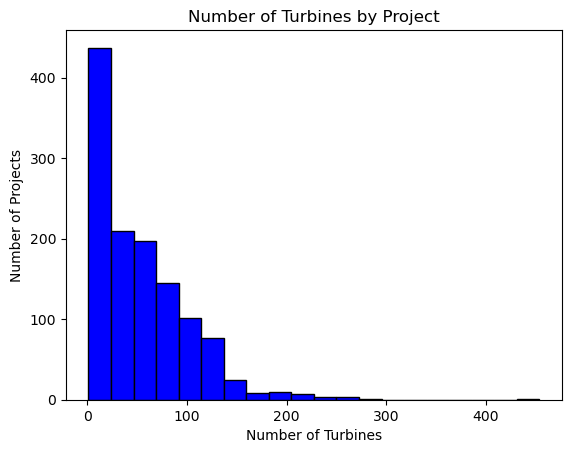

In [47]:
#plotted a histogram to examine the spread of turbine counts by projects.
plt.hist(turbine_count_by_project, bins=20, color='blue', edgecolor='black')
plt.title('Number of Turbines by Project')
plt.xlabel('Number of Turbines')
plt.ylabel('Number of Projects')
plt.show()

In [48]:
wind_df['Operator Name'].nunique()

638

In [49]:
operator_info= pd.DataFrame(wind_df.groupby(['Operator Name'])['project_name'].agg(['nunique', 'count']))
operator_info.rename(columns= {'nunique': 'project_count', 'count': 'turbine_count'}, inplace= True)
operator_info.sort_values(by='turbine_count', ascending= False).head(10)

project_count  turbine_count
Operator Name                                                     
Avangrid Renewables LLC                          62           3744
MidAmerican Energy Co                            45           3177
RWE Renewables Americas LLC                      30           2721
EDF Renewable Asset Holdings, Inc.               31           2206
Invenergy Services LLC                           30           2005
Pattern Operators LP                             15           1179
Leeward Asset Management, LLC                    20           1041
Northern States Power Co - Minnesota             13            982
AE Power Services LLC                            10            972
Southern Power Co                                14            950

In [50]:
#examined the operator name of off-shore wind turbines.
wind_df[wind_df['Reported\r\nPrime Mover'] == 'WS']['project_name'].unique()

array(['Block Island', 'Coastal Virginia Offshore Wind'], dtype=object)

In [51]:
wind_df[wind_df['Reported\r\nPrime Mover'] == 'WT']['project_name'].nunique()

1221

In [52]:
#imputed null values in project name. 
wind_df.loc[wind_df['project_name'] == 'Historic Victory Garden (Wind Stream)', 'operational_year'] = 1982

In [53]:
#converted operational_year to date/time format.
wind_df['operational_year']= wind_df['operational_year'].astype(int)
wind_df['operational_year'] = pd.to_datetime(wind_df['operational_year'], format='%Y').dt.year

In [54]:
#created a dataframe to summarize the turbine counts and their operational year. 
project_count_by_year= pd.DataFrame(wind_df.groupby(['operational_year', 'project_name'])['project_name', ].count())

In [55]:
project_count_by_year
# number of turbines 

project_name
operational_year project_name                                            
1982             Historic Victory Garden (Wind Stream)                215
                 Oak Creek Energy Systems                               4
1984             San Gorgonio Farms Wind Farm                          21
                 Tehachapi Windplant I                                134
1985             East Winds                                             7
                 H & S - Tehachapi                                     21
                 Ridgetop                                             215
                 San Gorgonio Farms Wind Farm                           1
                 Tehachapi Hills                                       24
                 Tehachapi Hills (85A)                                  2
                 Tehachapi Hills (85B)                                 36
1986             San Gorgonio Farms Wind Farm                          54
                 San Gorgonio Wind Associates 7                         2
                 Wintec Palm                                           22
1987             Difwind 6                                            190
1988             Dinosaur Point                                       162
1989             Mojave 16, 17 & 18 (Desertwind III PPC Tru           118
1990             San Gorgonio Farms Wind Farm                           1
1992             San Gorgonio Farms Wind Farm                           1
1994             Karen Avenue Windfarm                                  6
                 San Gorgonio Farms Wind Farm                           4
1997             Green Mountain Power                                  11
                 Kotzebue Wind Project Phase I                          6
                 Oak Creek Energy Systems                               5
                 Sibley Wind Farm                                       2
                 Tehachapi Windplant II                               202
1998             IDGWP                                                  3
                 Lake Benton I                                        139
                 Lincoln Wind Energy Facility                           2
                 Medicine Bow                                           2
                 Vansycle I                                            38
1999             Big Spring I                                          43
                 Big Spring II                                          3
                 Cabazon                                               51
                 Cameron Ridge                                         17
                 Cerro Gordo/Hawkeye Power/Clear Lake                   2
                 Enron Earth Smart/Green Power                         19
                 Kotzebue Wind Project Phases II & III                  5
                 Lakota Ridge                                          15
                 Llano Estacado Wind Ranch at Texico                    1
                 Medicine Bow                                           5
                 Moorhead                                               1
                 Oak Creek Energy Systems                               2
                 Oak Creek Wind Power Phase 2                          33
                 Rosiere Wind Farm                                     17
                 San Gorgonio Westwinds II LLC                         62
                 Shaokatan Hills                                       18
                 Storm Lake I                                         146
                 Storm Lake II                                        108
                 Waverly                                                2
2000             Madison Windpower                                      7
                 Medicine Bow                                           2
                 North Shaokatan Wind Farm                       

In [56]:
turbines_pct_chg= pd.DataFrame(wind_df['operational_year'].value_counts()).sort_index()

In [57]:
turbines_pct_chg['annual_growth']= turbines_pct_chg['operational_year'].pct_change()*100
turbines_pct_chg

operational_year  annual_growth
1982               219            NaN
1984               155     -29.223744
1985               306      97.419355
1986                78     -74.509804
1987               190     143.589744
1988               162     -14.736842
1989               118     -27.160494
1990                 1     -99.152542
1992                 1       0.000000
1994                10     900.000000
1997               226    2160.000000
1998               184     -18.584071
1999               550     198.913043
2000                37     -93.272727
2001              1840    4872.972973
2002               457     -75.163043
2003              1139     149.234136
2004               252     -77.875329
2005              1550     515.079365
2006              1381     -10.903226
2007              3186     130.702390
2008              4945      55.210295
2009              5650      14.256825
2010              2865     -49.292035
2011              3399      18.638743
2012              6552      92.762577
2013               578     -91.178266
2014              2495     331.660900
2015              4273      71.262525
2016              3757     -12.075825
2017              2993     -20.335374
2018              2940      -1.770799
2019              3494      18.843537
2020              5930      69.719519
2021              1959     -66.964587

## Feature Engineering: Creating new features

### 1. Compounded Annual Change Rate for Efficiency (fuel Consumed/ Net Power Generation)

In [58]:
netgen_df = pd.read_csv('Data/monthly_data_2012_2021_wt_ws.csv', na_values='.')

In [59]:
netgen_df.head()

Plant Id                   Operator Name Reported\r\nPrime Mover  YEAR  \
0         1  TDX Sand Point Generating, LLC                      WT  2021   
1        90      Nome Joint Utility Systems                      WT  2021   
2       508            City of Lamar - (CO)                      WT  2021   
3       692            SRIV Partnership LLC                      WT  2021   
4       944          City of Geneseo - (IL)                      WT  2021   

     Month  Quantity  Elec_Quantity  MMBtuPer_Unit  Tot_MMBtu  Elec_MMBtu  \
0  January       0.0            0.0            0.0      103.0       103.0   
1  January       0.0            0.0            0.0     1632.0      1632.0   
2  January       0.0            0.0            0.0    10060.0     10060.0   
3  January       0.0            0.0            0.0    18480.0     18480.0   
4  January       0.0            0.0            0.0     4351.0      4351.0   

     Netgen          date  
0    11.609  January 2021  
1   184.495  January 2021  
2  1137.468  January 2021  
3  2089.526  January 2021  
4   492.000  January 2021

In [60]:
netgen_df.columns

Index(['Plant Id', 'Operator Name', 'Reported\r\nPrime Mover', 'YEAR', 'Month',
       'Quantity', 'Elec_Quantity', 'MMBtuPer_Unit', 'Tot_MMBtu', 'Elec_MMBtu',
       'Netgen', 'date'],
      dtype='object')

In [61]:
netgen_df.rename(columns= {'Plant Id': 'plant_id'}, inplace= True)

In [62]:
# for every mwh of electricity produced, how much fuel was consumed (in MMbtus).

netgen_df['plant_efficiency']= netgen_df['Tot_MMBtu']/(netgen_df['Netgen'])

In [63]:
plant_id_efficiency= pd.DataFrame(netgen_df.groupby(['plant_id', 'YEAR'])['plant_efficiency'].mean())
plant_id_efficiency= plant_id_efficiency.reset_index()
plant_id_efficiency

plant_id  YEAR  plant_efficiency
0             1  2019          8.905109
1             1  2020          8.769539
2             1  2021          8.832899
3            90  2013               NaN
4            90  2014               NaN
5            90  2015          9.783700
6            90  2016          9.232944
7            90  2017          9.214212
8            90  2018          9.103715
9            90  2019          8.905179
10           90  2020          8.766629
11           90  2021          8.843575
12          508  2012          9.515957
13          508  2013          9.541015
14          508  2014          9.509968
15          508  2015          9.319119
16          508  2016          9.232055
17          508  2017          9.212945
18          508  2018          9.103992
19          508  2019          8.904926
20          508  2020          8.767005
21          508  2021          8.844077
22          692  2012          9.515958
23          692  2013          9.540851
24          692  2014          9.510071
25          692  2015          9.318993
26          692  2016          9.231910
27          692  2017          9.213108
28          692  2018          9.104022
29          692  2019          8.905052
30          692  2020          8.767007
31          692  2021          8.843847
32          944  2012          9.516040
33          944  2013          9.969404
34          944  2014          9.510108
35          944  2015          9.318984
36          944  2016          9.232146
37          944  2017          9.212841
38          944  2018          9.103894
39          944  2019          8.904860
40          944  2020          8.767216
41          944  2021          8.843843
42         1172  2012          9.515876
43         1172  2013          9.540707
44         1172  2014          9.510500
45         1172  2015          9.318849
46         1172  2016          9.232070
47         1172  2017          9.212669
48         1172  2018          9.103949
49         1172  2019          8.905171
50         1172  2020          8.766525
51         1172  2021          8.843983
52         1998  2012          9.515920
53         1998  2013          9.541094
54         1998  2014          9.510244
55         1998  2015          9.319428
56         1998  2016          9.231678
57         1998  2017          9.213341
58         1998  2018          9.104011
59         1998  2019          8.905371
60         1998  2020          8.767148
61         1998  2021          8.844003
62         2022  2012          9.515918
63         2022  2013          9.541287
64         2022  2014          9.509805
65         2022  2015          9.319414
66         2022  2016          9.232044
67         2022  2017          9.212582
68         2022  2018          9.103893
69         2022  2019          8.904981
70         2022  2020          8.766689
71         2022  2021          8.843937
72         2024  2012               NaN
73         2024  2013          9.540845
74         2024  2014          9.509917
75         2024  2015          9.318956
76         2024  2016          9.232002
77         2024  2017          9.213002
78         2024  2018          9.104214
79         2024  2019          8.905070
80         2024  2020          8.767052
81         2024  2021          8.844094
82         2240  2018               NaN
83         2240  2019          8.905001
84         2240  2020          8.767001
85         2240  2021               NaN
86         6304  2012          9.515996
87         6304  2013          9.540852
88         6304  2014          9.510096
89         6304  2015          9.318972
90         6304  2016          9.232107
91         6304  2017          9.212503
92         6304  2018          9.103988
93         6304  2019          8.905420
94         6304  2020          8.767520
95         6304  2021          8.844214
96         7366  2012          9.516087
97         7366  2013          9.541000
98         7366  2014          9.510075
99     

In [64]:
plant_id_efficiency_pivoted = plant_id_efficiency.pivot(index= 'plant_id', columns='YEAR', values='plant_efficiency').reset_index()

In [65]:
plant_id_efficiency_pivoted.head()

YEAR  plant_id      2012      2013      2014      2015      2016      2017  \
0            1       NaN       NaN       NaN       NaN       NaN       NaN   
1           90       NaN       NaN       NaN  9.783700  9.232944  9.214212   
2          508  9.515957  9.541015  9.509968  9.319119  9.232055  9.212945   
3          692  9.515958  9.540851  9.510071  9.318993  9.231910  9.213108   
4          944  9.516040  9.969404  9.510108  9.318984  9.232146  9.212841   

YEAR      2018      2019      2020      2021  
0          NaN  8.905109  8.769539  8.832899  
1     9.103715  8.905179  8.766629  8.843575  
2     9.103992  8.904926  8.767005  8.844077  
3     9.104022  8.905052  8.767007  8.843847  
4     9.103894  8.904860  8.767216  8.843843

In [66]:
#drop rows that had netgen = 0 in 2021. 
plant_id_efficiency_pivoted= plant_id_efficiency_pivoted.drop(plant_id_efficiency_pivoted[plant_id_efficiency_pivoted[2021] == 0].index)

In [67]:
plant_id_efficiency_pivoted.shape

(1359, 11)

In [68]:
plant_id_efficiency_pivoted['operation_years']= plant_id_efficiency_pivoted.count(axis=1)

In [69]:
# minus one as operator_name was included in the count. 
plant_id_efficiency_pivoted['operation_years']= plant_id_efficiency_pivoted['operation_years']- 1

In [70]:
plant_id_efficiency_pivoted['operation_years'].value_counts()

10    681
2      94
6      84
7      81
1      77
9      76
5      70
3      66
8      64
4      59
0       7
Name: operation_years, dtype: int64

In [71]:
plant_id_efficiency_pivoted[plant_id_efficiency_pivoted['operation_years'] == 0]

YEAR  plant_id  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  \
20        7927   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
188      56216   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
190      56218   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
246      56402   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
747      57922   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1314     63689   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1354     65316   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

YEAR  operation_years  
20                  0  
188                 0  
190                 0  
246                 0  
747                 0  
1314                0  
1354                0

In [72]:
#drop rows that had operation_years < 3 in 2021. 
plant_id_efficiency_pivoted= plant_id_efficiency_pivoted.drop(plant_id_efficiency_pivoted[plant_id_efficiency_pivoted['operation_years'] < 3].index)

In [73]:
plant_id_efficiency_pivoted.reset_index(inplace= True)
plant_id_efficiency_pivoted.drop('index', axis=1, inplace= True)

In [74]:
plant_id_efficiency_pivoted.shape

(1181, 12)

In [75]:
plant_id_efficiency_pivoted

YEAR  plant_id      2012      2013      2014      2015      2016      2017  \
0            1       NaN       NaN       NaN       NaN       NaN       NaN   
1           90       NaN       NaN       NaN  9.783700  9.232944  9.214212   
2          508  9.515957  9.541015  9.509968  9.319119  9.232055  9.212945   
3          692  9.515958  9.540851  9.510071  9.318993  9.231910  9.213108   
4          944  9.516040  9.969404  9.510108  9.318984  9.232146  9.212841   
5         1172  9.515876  9.540707  9.510500  9.318849  9.232070  9.212669   
6         1998  9.515920  9.541094  9.510244  9.319428  9.231678  9.213341   
7         2022  9.515918  9.541287  9.509805  9.319414  9.232044  9.212582   
8         2024       NaN  9.540845  9.509917  9.318956  9.232002  9.213002   
9         6304  9.515996  9.540852  9.510096  9.318972  9.232107  9.212503   
10        7366  9.516087  9.541000  9.510075  9.319016  9.232086  9.213031   
11        7381  9.515847  9.541022  9.509947  9.318947  9.232093  9.212859   
12        7501  9.516086  9.541260  9.509874  9.319185  9.232355  9.213089   
13        7526  9.516001  9.540998  9.509996  9.319005  9.231997  9.212995   
14        7771       NaN       NaN  9.510065  9.319022  9.231939  9.213051   
15        7855  9.515420  9.540981  9.509876  9.318720  9.232553  9.214075   
16        7886  9.516018  9.540898  9.509963  9.319120  9.231858  9.212946   
17        7901  9.516143  9.540514  9.510042  9.319210  9.232153  9.213599   
18        7936  9.516008  9.540999  9.509993  9.318999  9.231996  9.213002   
19        7937  9.515993  9.540943  9.510032  9.319010       NaN       NaN   
20        7965  9.516227  9.540930  9.510038  9.318773  9.232419  9.213138   
21        7966  9.515996  9.541276  9.510059  9.318122       NaN  9.212038   
22        7974  9.516167  9.541278  9.510327  9.318506  9.232103  9.212336   
23       10005  9.516152  9.541007  9.510054  9.318963       NaN  9.212852   
24       10027  9.516007  9.540982  9.510042  9.318776  9.232075  9.213177   
25       10191  9.516065  9.541024  9.509980  9.318696  9.232003  9.212993   
26       10586  9.515997  9.540977  9.510013  9.319006  9.232011  9.212987   
27       10597  9.515976  9.540990  9.510028  9.319018  9.232024  9.212966   
28       10718  9.516034  9.540971  9.509961  9.318985  9.231982  9.213028   
29       10815  9.516066  9.540950  9.509982  9.318948       NaN       NaN   
30       10823  9.515615  9.542245       NaN  9.318072  9.231362  9.211929   
31       50276  9.516012  9.541180  9.509865  9.318979  9.231671  9.214696   
32       50281  9.515997  9.541003  9.509996  9.318887  9.232022  9.212991   
33       50386  9.515954  9.541082  9.510019  9.319004  9.232027  9.212963   
34       50485  9.516017  9.541056  9.510022  9.319066  9.231984  9.213015   
35       50532       NaN  9.541038  9.509998  9.318984  9.232024  9.213102   
36       50533  9.515979  9.540991  9.509967  9.318971  9.232013  9.212985   
37       50535  9.515995  9.538035  9.509930  9.318115  9.231809  9.212964   
38       50536  9.515959  9.541003  9.509989  9.318996  9.232003  9.212989   
39       50552  9.515990  9.541011  9.509963  9.318969  9.232014  9.212929   
40       50553  9.515936  9.541032  9.509967  9.318987  9.232034  9.212954   
41       50690  9.516004  9.540992  9.510015  9.319002  9.231993  9.213011   
42       50712  9.516095  9.540742  9.509683  9.319002       NaN       NaN   
43       50754  9.515982  9.541010  9.509973  9.318923  9.232030  9.212966   
44       50820  9.516041       NaN  9.510399  9.319029  9.232111  9.212782   
45       50821  9.516008  9.540979  9.510015  9.319126  9.231991  9.212947   
46       50822  9.515950  9.541262  9.509970  9.318924  9.231962  9.213062   
47       50823  9.515976  9.540949  9.510034  9.319036  9.231999  9.212975   
48       52142  9.516026  9.540995  9.510010  9.318999  9.232015  9.212964   
49       52143  9.516000  9.540972  9.510009  9.319014  9.232021  9.212978   
50       52144  9.5160

In [76]:
CACR_list = []

for index, row in plant_id_efficiency_pivoted.iterrows():
    
    if row['operation_years'] == 10:
        earliest_operation= row[2013]
    elif row['operation_years'] == 9:
        earliest_operation= row[2014]
    elif row['operation_years'] == 8:
        earliest_operation= row[2015]
    elif row['operation_years'] == 7:
        earliest_operation= row[2016]
    elif row['operation_years'] == 6:
        earliest_operation= row[2017]
    elif row['operation_years'] == 5:
        earliest_operation= row[2018]
    elif row['operation_years'] == 4:
        earliest_operation= row[2019]
    elif row['operation_years'] == 3:
        earliest_operation= row[2020]
    
    final_first_change= row[2021]/earliest_operation  #final value over beginning value
    root= row['operation_years']
    
    CACR = ((math.pow(final_first_change, 1/root)) - 1)*100 
    CACR_list.append(CACR)

In [77]:
len(CACR_list)

1181

In [78]:
plant_id_efficiency_pivoted['CACR']= pd.DataFrame(CACR_list)

In [79]:
plant_id_efficiency_pivoted.to_csv('Data/plant_id_efficiency2.csv')

### 2. Compounded Annual Growth Rate for Net Power Generation

In [80]:
netgen_df['Month']= netgen_df['Month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4,
                                                    'May': 5, 'June': 6, 'July': 7, 'Aug': 8, 'Sep': 9,
                                                    'October': 10, 'November': 11, 'December': 12})

In [81]:
plant_id_netgen= pd.DataFrame(netgen_df.groupby(['plant_id', 'YEAR'])['Netgen'].sum())
plant_id_netgen= plant_id_netgen.reset_index()

In [82]:
plant_id_netgen.to_csv('Data/plant_id_netgen_original.csv')

In [83]:
plant_id_netgen.head()

plant_id  YEAR  Netgen
0         1  2019  1022.0
1         1  2020   347.0
2         1  2021   134.0
3        90  2013     0.0
4        90  2014     0.0

In [84]:
plant_id_netgen_pivoted = plant_id_netgen.pivot(index= 'plant_id', columns='YEAR', values='Netgen')

In [85]:
plant_id_netgen_pivoted= plant_id_netgen_pivoted.replace(0, np.nan)

In [86]:
plant_id_netgen_pivoted= plant_id_netgen_pivoted.reset_index()

In [87]:
plant_id_netgen_pivoted['operation_years']= plant_id_netgen_pivoted.count(axis=1)

In [88]:
# minus one as operator_name was included in the count. 
plant_id_netgen_pivoted['operation_years']= plant_id_netgen_pivoted['operation_years']- 1

In [89]:
#drop rows that had netgen = 0 in 2021. 
plant_id_netgen_pivoted= plant_id_netgen_pivoted.drop(plant_id_netgen_pivoted[plant_id_netgen_pivoted[2021] == 0].index)

In [90]:
#drop rows that had operation years < 3 years 
plant_id_netgen_pivoted= plant_id_netgen_pivoted.drop(plant_id_netgen_pivoted[plant_id_netgen_pivoted['operation_years'] < 3].index)

In [91]:
plant_id_netgen_pivoted.shape

(1181, 12)

In [92]:
plant_id_netgen_pivoted= plant_id_netgen_pivoted.reset_index()
plant_id_netgen_pivoted.drop('index', axis=1, inplace= True)

In [93]:
plant_id_netgen_pivoted

YEAR  plant_id        2012         2013         2014         2015  \
0            1         NaN          NaN          NaN          NaN   
1           90         NaN          NaN          NaN        2.000   
2          508    13255.00    21978.000    10359.000     9806.000   
3          692    17493.00    17893.000    10317.000    14703.000   
4          944     7217.00        5.000     6962.000     6956.000   
5         1172     4877.00     4719.000     5191.000     5023.000   
6         1998     3266.00     3870.000     3813.000     3596.000   
7         2022     7559.00     4909.000     7255.000     7806.000   
8         2024         NaN    14865.000    16249.000    13682.000   
9         6304     2955.00     1196.000     4542.000     3239.000   
10        7366    14454.00    14624.000    13610.000    13170.000   
11        7381    12172.00    12196.000    10936.000    12220.000   
12        7501     3988.00     4038.000     4370.000     4903.000   
13        7526   514745.00   617658.000   562350.000   570308.000   
14        7771         NaN          NaN    10472.220     9445.000   
15        7855     2353.00     1651.000     1644.000     2480.000   
16        7886    20277.00    19017.000    17717.000    16758.000   
17        7901     2545.00     2543.000     2632.000     2667.000   
18        7936   258053.00   224897.000   244273.000   211208.000   
19        7937    54281.00    57220.000    61523.000    42843.000   
20        7965     2598.00     2834.000     2723.000     2360.000   
21        7966     4982.00     5314.000     5465.000     2741.000   
22        7974     4824.00     4743.000     3990.000     2895.000   
23       10005    23258.00    24822.000    24587.000    27126.000   
24       10027    45011.00    42867.000    40053.000    39000.000   
25       10191    14343.00    13228.000    13895.000    12097.000   
26       10586   168645.00   162659.000   176326.000   152363.000   
27       10597    62838.00    63019.000    66775.000    53707.000   
28       10718    30489.00    28584.000    23329.000    28552.000   
29       10815    38617.00    40968.000    32451.000    35343.000   
30       10823     1643.40     1171.170          NaN     1557.270   
31       50276     9767.00     7626.000     7850.000     3110.000   
32       50281    74539.00    78855.000    69706.000    80645.000   
33       50386    36118.00    34916.000    33912.000    27259.000   
34       50485    39366.00    37657.000    37867.000    28752.000   
35       50532         NaN    25055.000    25410.000    20576.000   
36       50533    30473.00    32420.000    32333.000    31806.000   
37       50535    44332.00    29671.000     5007.000     9308.000   
38       50536   110279.00   162677.000   172090.000   130557.000   
39       50552    71929.00    66611.000    56710.000    57036.000   
40       50553    44665.00    46688.000    46637.000    43200.000   
41       50690   125992.00   121571.000   111118.000   114519.000   
42       50712   379143.00   381192.000   339513.000   195384.000   
43       50754    65450.00    62709.000    55517.000    54537.000   
44       50820    15156.00          NaN     4819.000     4879.710   
45       50821    28670.00    44089.000    35493.000    27245.000   
46       50822    27137.00    41312.000    31927.000    27180.000   
47       50823    41374.00    53356.000    48069.000    38621.000   
48       52142    52181.00    74058.000    74810.000    65278.000   
49       52143    45137.00    61721.000    66759.660    53314.000   
50       52144    45909.00    62235.000    68967.000    55853.000   
51       52160    33618.00    43618.000    37462.000    31613.000   
52       52161    21309.00    27785.000    26082.000    21592.000   
53       52162    14816.00    18640.000    16839.000    13347.000   
54       52163    19584.00    25968.000    22336.000    17296.000   
55       52165     2322.00     2818.000     2580.000     2124.000   
56       54258    17995.00     1644.000          NaN     9657.000  

In [94]:
plant_id_netgen_pivoted['operation_years'].value_counts()

10    681
6      84
7      81
9      76
5      70
3      66
8      64
4      59
Name: operation_years, dtype: int64

In [95]:
CAGR_netgen_list = []

for index, row in plant_id_netgen_pivoted.iterrows():
    
    if row['operation_years'] == 10:
        earliest_operation= row[2013]
    elif row['operation_years'] == 9:
        earliest_operation= row[2014]
    elif row['operation_years'] == 8:
        earliest_operation= row[2015]
    elif row['operation_years'] == 7:
        earliest_operation= row[2016]
    elif row['operation_years'] == 6:
        earliest_operation= row[2017]
    elif row['operation_years'] == 5:
        earliest_operation= row[2018]
    elif row['operation_years'] == 4:
        earliest_operation= row[2019]
    elif row['operation_years'] == 3:
        earliest_operation= row[2020]
    
    final_first_change= row[2021]/earliest_operation  #final value over beginning value
    root= row['operation_years'] -1
    
    CAGR_netgen = ((math.pow(final_first_change, 1/root)) - 1)*100 
    CAGR_netgen_list.append(CAGR_netgen)

In [96]:
len(CAGR_netgen_list)

1181

In [97]:
plant_id_netgen_pivoted['CAGR_netgen']= pd.DataFrame(CAGR_netgen_list)

In [98]:
plant_id_netgen_pivoted.to_csv('Data/plant_id_netgen_2.csv')

### 3. Compounded Annual Change Rate for Uptime (NetGen/ Capacity)

In [99]:
uptime_df = pd.read_csv(r'Data/plant_id_uptime.csv')

In [100]:
uptime_df.head()

Unnamed: 0  plant_id  YEAR  uptime
0           0        90  2013     0.0
1           1        90  2014     0.0
2         148      7927  2013     0.0
3         149      7927  2014     0.0
4         150      7927  2015     0.0

In [101]:
uptime_df.drop(['Unnamed: 0'], axis=1, inplace= True)

In [102]:
uptime_df_pivoted= uptime_df.pivot(index= 'plant_id', columns='YEAR', values='uptime')

In [103]:
uptime_df_pivoted.head()

YEAR             2013         2014         2015         2016         2017  \
plant_id                                                                    
90           0.000000     0.000000     0.769231   649.230769   737.692308   
508       3663.000000  1726.500000  1634.333333  1723.833333  1763.333333   
692       2933.278689  1691.311475  2410.327869  1341.311475  2986.393443   
944          1.666667  2320.666667  2318.666667  2191.333333  2096.716667   
1172      2949.375000  3244.375000  3139.375000  2875.000000  2327.500000   

YEAR             2018         2019         2020         2021  
plant_id                                                      
90         786.153846   949.230769   916.538462  1183.333333  
508       1766.000000  1658.333333  2205.333333  2124.000000  
692       2858.852459  2505.483871  2600.161290  2918.387097  
944       1963.333333  2080.000000  1951.666667  2053.000000  
1172      2635.000000  2672.500000  2733.125000  2628.750000

In [104]:
#uptime_df_pivoted.drop

uptime_df_pivoted.drop(uptime_df_pivoted[uptime_df_pivoted[2021] == 0].index, inplace= True)

In [105]:
uptime_df_pivoted= uptime_df_pivoted.replace(0, np.nan)

In [106]:
uptime_df_pivoted['operation_years']= uptime_df_pivoted.count(axis=1)

In [107]:
#drop rows that had operation years < 3 years 
uptime_df_pivoted= uptime_df_pivoted.drop(uptime_df_pivoted[uptime_df_pivoted['operation_years'] < 3].index)

In [108]:
uptime_df_pivoted.shape

(1023, 10)

In [109]:
uptime_df_pivoted= uptime_df_pivoted.reset_index()

In [110]:
uptime_df_pivoted.head()

YEAR  plant_id         2013         2014         2015         2016  \
0           90          NaN          NaN     0.769231   649.230769   
1          508  3663.000000  1726.500000  1634.333333  1723.833333   
2          692  2933.278689  1691.311475  2410.327869  1341.311475   
3          944     1.666667  2320.666667  2318.666667  2191.333333   
4         1172  2949.375000  3244.375000  3139.375000  2875.000000   

YEAR         2017         2018         2019         2020         2021  \
0      737.692308   786.153846   949.230769   916.538462  1183.333333   
1     1763.333333  1766.000000  1658.333333  2205.333333  2124.000000   
2     2986.393443  2858.852459  2505.483871  2600.161290  2918.387097   
3     2096.716667  1963.333333  2080.000000  1951.666667  2053.000000   
4     2327.500000  2635.000000  2672.500000  2733.125000  2628.750000   

YEAR  operation_years  
0                   7  
1                   9  
2                   9  
3                   9  
4                   9

In [111]:
CACR_uptime_list = []

for index, row in uptime_df_pivoted.iterrows():
    
    if row['operation_years'] == 9:
        earliest_operation= row[2014]
    elif row['operation_years'] == 8:
        earliest_operation= row[2015]
    elif row['operation_years'] == 7:
        earliest_operation= row[2016]
    elif row['operation_years'] == 6:
        earliest_operation= row[2017]
    elif row['operation_years'] == 5:
        earliest_operation= row[2018]
    elif row['operation_years'] == 4:
        earliest_operation= row[2019]
    elif row['operation_years'] == 3:
        earliest_operation= row[2020]
    
    final_first_change= row[2021]/earliest_operation  #final value over beginning value
    root= row['operation_years'] -1
    
    CACR_uptime = ((math.pow(final_first_change, 1/root)) - 1)*100 
    CACR_uptime_list.append(CACR_uptime)

In [112]:
len(CACR_uptime_list)

1023

In [113]:
uptime_df_pivoted['CACR_uptime']= pd.DataFrame(CACR_uptime_list)

In [114]:
uptime_df_pivoted.head()

YEAR  plant_id         2013         2014         2015         2016  \
0           90          NaN          NaN     0.769231   649.230769   
1          508  3663.000000  1726.500000  1634.333333  1723.833333   
2          692  2933.278689  1691.311475  2410.327869  1341.311475   
3          944     1.666667  2320.666667  2318.666667  2191.333333   
4         1172  2949.375000  3244.375000  3139.375000  2875.000000   

YEAR         2017         2018         2019         2020         2021  \
0      737.692308   786.153846   949.230769   916.538462  1183.333333   
1     1763.333333  1766.000000  1658.333333  2205.333333  2124.000000   
2     2986.393443  2858.852459  2505.483871  2600.161290  2918.387097   
3     2096.716667  1963.333333  2080.000000  1951.666667  2053.000000   
4     2327.500000  2635.000000  2672.500000  2733.125000  2628.750000   

YEAR  operation_years  CACR_uptime  
0                   7    10.522661  
1                   9     2.623894  
2                   9     7.056961  
3                   9    -1.520231  
4                   9    -2.595891

In [115]:
uptime_df_pivoted.to_csv('Data/uptime_CACR_2.csv')